In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import the dataset 
df = pd.read_csv("Salary_Data.csv")

In [6]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


# Simple linear regression 
y=mx+b  or, in this case, salary=m(years of experiance) + b
* note that in this case, we do not need to scale our values, as the sklearn library will autoscale features

In [33]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

Fit the linear regressor to the training data

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Use the linear regressor to predict for the test data set

In [36]:
# vector of predictions
y_pred = regressor.predict(X_test)

In [38]:
display(y_pred)
display(y_test)

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

Visualize with experience on X and salary on Y

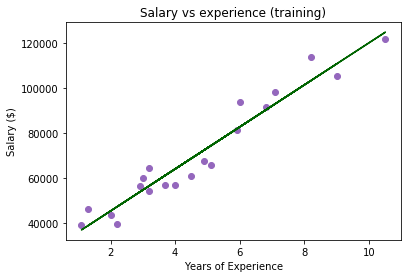

In [40]:
plt.scatter(X_train, y_train, c='tab:purple')
plt.plot(X_train, regressor.predict(X_train), c='darkgreen')
plt.title("Salary vs experience (training)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.show()

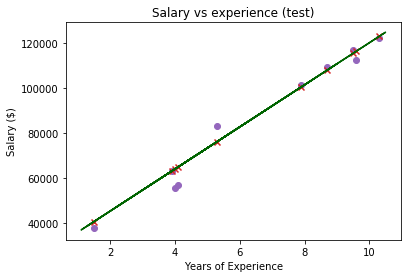

In [45]:
plt.scatter(X_test, y_test, c='tab:purple')
plt.scatter(X_test, y_pred, c='tab:red', marker="x")
plt.plot(X_train, regressor.predict(X_train), c='darkgreen')
plt.title("Salary vs experience (test)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.show()

In [48]:
display(regressor.score(X_train, y_train))
display(regressor.get_params())

0.9381900012894278

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}